# 01. Librerías y datos

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from darts.datasets import AustralianTourismDataset
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

In [8]:
tourism_series= AustralianTourismDataset().load()

In [31]:
tourism_series = pd.Series(tourism_series['Total'].values().reshape(-1))

# 02. Análisis exploratorio de serie de tiempo

In [32]:
px.line(tourism_series, title="Australian Tourism Series").show()

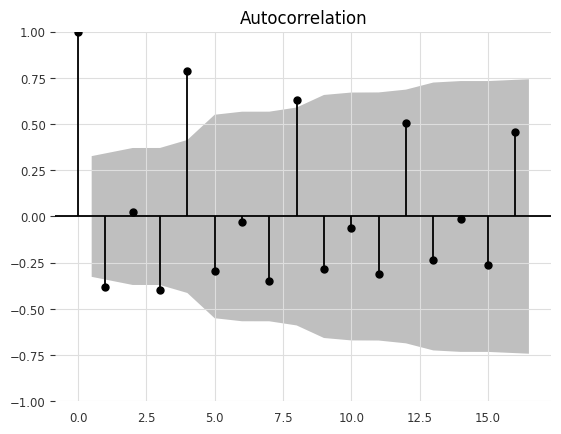

In [33]:
plot_acf(tourism_series);

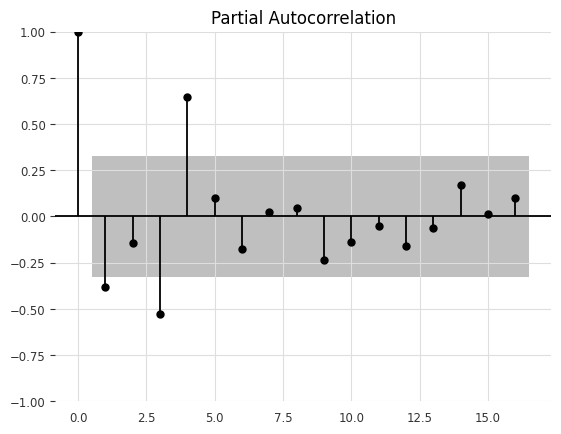

In [34]:
plot_pacf(tourism_series);

In [40]:
s_tourism_series= diff(diff(tourism_series),k_seasonal_diff=1,seasonal_periods=4)
px.line(s_tourism_series, title="Seasonally differenced Australian Tourism Series").show()

In [41]:
from statsmodels.stats.diagnostic import acorr_ljungbox
m = int(np.log(len(tourism_series)))

acorr_ljungbox(s_tourism_series, lags=[m])

,lb_stat,lb_pvalue
3,20.081759,0.000163


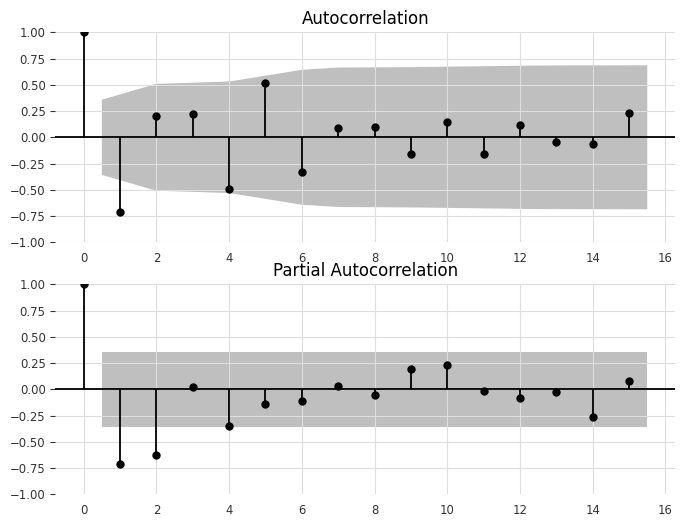

In [43]:
fig,ax = plt.subplots(2,1,figsize=(8,6))
plot_acf(s_tourism_series,ax=ax[0])
plot_pacf(s_tourism_series,ax=ax[1])
plt.show()

In [49]:
import statsmodels.api as sm
pp, qq, PP, QQ, aic, lb, sse = [], [], [], [], [], [], []
for p in range(0,2):
    for q in range(0,2):
        for P in range(0,2):
            for Q in range(0,2):
                model=sm.tsa.statespace.SARIMAX(tourism_series,order=(p, 1, q),seasonal_order=(P,1,Q,4))
                res = model.fit()
                pp.append(p)
                qq.append(q)
                PP.append(P)
                QQ.append(Q)
                aic.append(res.aic)
                lb.append(acorr_ljungbox(res.resid, lags=[m]))
                sse.append((res.resid**2).sum())

resdf = pd.DataFrame({"p": pp, "q": qq, "P": PP, "Q": QQ, "AIC": aic, "LB p-value": lb, "SSE": sse})
resdf.sort_values("AIC")

c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,p,q,P,Q,AIC,LB p-value,SSE
5,0,1,0,1,-93.913265,lb_stat lb_pvalue 3 0.018075 0.999357,158.748738
7,0,1,1,1,-92.521761,lb_stat lb_pvalue 3 0.018011 0.999361,158.746600
13,1,1,0,1,-92.025380,lb_stat lb_pvalue 3 0.018139 0.999354,158.748459
9,1,0,0,1,-91.036154,lb_stat lb_pvalue 3 0.017806 0.999371,158.756199
6,0,1,1,0,-91.011807,lb_stat lb_pvalue 3 0.018228 0.999349,158.755707
15,1,1,1,1,-90.882382,lb_stat lb_pvalue 3 0.018108 0.999355,158.745525
10,1,0,1,0,-90.448156,lb_stat lb_pvalue 3 0.017997 0.999361,158.758037
14,1,1,1,0,-90.389209,lb_stat lb_pvalue 3 0.018386 0.999341,158.752354
11,1,0,1,1,-88.726413,lb_stat lb_pvalue 3 0.017927 0.999365,158.757397
1,0,0,0,1,-81.589862,lb_stat lb_pvalue 3 0.017458 0.99939,158.791057


In [51]:
model=sm.tsa.statespace.SARIMAX(s_tourism_series,order=(0, 1, 1),seasonal_order=(1,1,0,4))
res = model.fit()
res.summary()

c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 4)   Log Likelihood                -272.369
Date:                            Tue, 09 Apr 2024   AIC                            550.737
Time:                                    06:31:50   BIC                            554.394
Sample:                                         0   HQIC                           551.751
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.366     -2.729      0.006      -1.718      -0.282
ar.S.L4       -0.7629      0.227     -3.363      0.001      -1.207      -0.318
sigma2      1.546e+08   2.37e-09   6.52e+16      0.000    1.55e+08    1.55e+08
===================================================================================
Ljung-Box (L1) (Q):                  16.01   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.00   Prob(JB):                         0.73
Heteroskedasticity (H):               1.21   Skew:                            -0.09
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+32. Standard errors may be unstable.
"""